# Practice : making a two-layer neural network

In [185]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_circles
from sklearn.metrics import accuracy_score, log_loss
from tqdm import tqdm

On code un reseau de neurones de la meme maniere qu'un reseau. et oui je vous ai bien dit : comprendrenez l'rchitecture, la methode, et vous serez capable de reproduire n'importe quel reseau de neurones.

Comme pour le neurone, Le reseau de neurone a besoin d'un modele, d'une fonction qui permette de determiner un cout, d;une fonction qui permet d'optimiser ce cout, et d'une fonction qui mette a jour correctement les parametres du modele. ca n'a absolument pas change d'un neurone car les deux sont une strucure qui appartient au deep learning. il nous faut donc une fonction d'initialisation des parametres, un model, une fonction de cout, et une fonction d'optimisation. Choisissons les memes fonctions qu'on avait choisi pour le neurone pour comprendre les differences entre les deux.

Deja, qu'est ce qui ne change pas ? Eh bien bonne nouvelle, presque rien. On utilise la meme architecture (modele / cout / optimisation / mise a jour), le meme fonctionnement de la fonction d'activation, la meme fonction de cout, et la meme fonction d'optimisation et d'update des parametres.

La seule chose qui change vraiment, et qui est une nouveaute par rapport au neurone, c'est que pour un reseau de neurones, **il faut comprendre la notion de dimension**.

## Qu'est ce que la dimension ?
La dimension permet de dimensionner notre structure. pour un seul neurone, on n'en parle pas vraiment car c'est la structure la plus simple qui existe. 
Pour un reseau de neurone, la dimension permet tout de suite de comprendre le reseau: son nombre de couches, le nombre de neurones dans chaque couche.

Pourquoi c'est important ?
Initialiser avec les bonnes dimensions permet un calcul matriciel correct, c'est a dire un reseau de neurones fonctionnel. 
Le calcul matriciel est le squelette de notre reseau de neurones. c'est son ossature, sa structure. Sa langue maternelle.

Initilaiser avec les bonnes dimensions permet de s'adapter parfaitement au probleme qu'on veut resoudre.

Donc la question qui doit vous venir en tete, c'est :
## Comment on fait ?
On definit les dimensions de notre reseau de neurone en initialisant les parametres de notre reseau de neurones. A savoir, les poids et les biais.
Pourquoi ? car comme je l'ai dit dans le notebook theorique, Pour creer une couche dans motre reseau de neurone, on creer une nouvelle matrice de poids et un nouvelle matrice de biais. Pour ajouter des neurones dans une couche, On joue sur la dimensions des matrices poids et biais existantes.

On cree donc le nombre de couche qu'on veut en creant le bon nombre de matrices poids et biais.
Et on cree le nombre de neurones qu'on veut dans chaque couche en jouant sur la taille (dimension) de ces matrices poids et biais.

MAIS, il faut que notre reseau de neurones soit coherent.Il faut qu'il respecte une regle: Il doit s'adapter a la dimension de notre jeu de donnees en entree

Reprenons l'exemple des plantes toxiques/non toxiques. Rapellez vous, nous avions un graphe de donnees a deux axes, un axe pour la largeur et un pour la longueur de la feuille de la plante. Donc chaque plante pouvait etre reprensete sur ce graphe a deux axes, donc le jeu de donne en entree avait deux dimensions.
Donc pour notre reseau de neurones, il faut que la matrice de poids et la matrice de biais de la premiere couche s'adaptent a cette dimension. Or ce sont des matrices, donc on peut donc jouer avec la taille de ces matrices pour les adapter a la dimension. Il faudra donc que la matrice de poids de la premiere couche ait deux lignes (une pour chaque dimension) et autant de colonnes qu'il y a de neurones dans cette couche. On peut tres bien faire l'inverse puis transposer la matrice. regarder sur internet la transpose d'une matrice, c'est simple comme bonjour. 

On a donc notre preniere couche en definissant correctment la preniere matrice de poids (la matrice de biais et moins importante, elle prend juste la dimension du nombre de neurones de la couche).

Pour chaque couche suivante, on initialise la matrice de poids avec la meme logiaue, en la faisant s'adapter a la dimension de la couche precedente. Donc si on a n neurones dans la couche precedente, il faut que la matrice de poids de la couche suivante ait n lignes et autant de colonnes qu'il y a de neurones dans cette couche.

Jusqu'a la derniere couche, ou la dimension de celle ci dicte le nombre de sorties de notre reseau de neurones. Donc la matrice de poids de la derniere couche doit avoir autant de lignes qu'il y a de neurones dans la couche precedente, et autant de colonnes qu'il y a neurone dans cette chouche, a savoir de sorties dans notre reseau de neurones.

> la dimension des parametres permet aux differentes couche de notre resau de neurones d'etre connectee et de de communiquer entre elles.

Voila la vraie raison de l'initialisation. Elle n'est pas le pour faire jolie, elle est la pour decrire precisement la structure de notre reseau de neurones et l'adapter a notre probleme.

Si vous avez compris ca, vous faites deja partie d'un cercle fermé. 

regardons comment on code tout ca maintenant.

Pour que notre fonction initialisation decrive precisement la structure de notre reseau de neurones et le fasse s'adapter a notre probleme, Elle a besoin de la dimension de notre jeu de donnees (donnes d'entree) et le nombre de neurones qu'on prevoit de mettre dans dans chaque couche. Ensuite on creera nous meme les matrices parametres de facon a initilsaser le nombre de couches, et l'initialistaion s'occupe du reste. voyez plutot :

In [186]:
def initialisation(n0, n1, n2):
    # n0 est la dimension de l'entrée --> le nombre d'entree dans le réseau
    # n1 est la dimension de la premiere couche --> le nombre de neurones dans la premier ecouche
    # n2 est la dimension de la sortie --> le nombre de neurones dans la couche de sortie

    #Avec ces 3 diemensions, on va créer le réseau de neurones

    # on adapte le premiere couche aux jeu de données en entree:
    W1 = np.random.randn(n1, n0)
    # point de depart: n0 ; point d'arrivé: n1

    b1 = np.random.randn(n1, 1)
    # b1 est le biais de la premiere couche, c'est un vecteur colonne de meme dimension que sa couche (biais pour chaque neurone)
    
    # on adapte la deuxieme couche a la premiere
    W2 = np.random.randn(n2, n1)
    #point de depart: n1 ; point d'arrivé: n2
    # n2 est la dimension de la sortie --> le nombre de neurones dans la couche de sortie
    # la matrice W2 agit comme la connection entre la 1ere couche et la seconde couche qui est la couche de sortie ici

    b2 = np.random.randn(n2, 1)
    # b2 est le biais de la deuxieme couche, c'est un vecteur colonne de meme dimension que sa couche (biais pour chaque neurone)

    # on met tout ca dans un dictionnaire, c;est plus pratique
    # on va pouvoir acceder, fair l'udate de chaque parametre par son nom
    parameters = {
        'W1': W1,
        'W2': W2,
        'b1': b1,
        'b2': b2
    }

    return parameters

Tu as compris la focntion la plus importante de notre reseau de neurones car c'est celle qui change le plus par rapport au neurone simple.

Maimtenant, toutes les autres fonctions sont les memes qu'abec le neurone simple, mais en version matricielle. Je vous l'ai dit, la calcul matriciel est le squelette de notre reseau de neurones car il y a une affaire de dimensions maintenant. Il faut donc que toutes les autres fonctions soient adaptees a ce calcul matriciel.

Maintenant qu'on a notre resaue de neurones, on va coder la fonction qui fait passer toutes les donnees d'entree dans le reseau de neurones.

In [187]:
def forward_propagation(X, parametres):

    W1 = parametres['W1']
    b1 = parametres['b1']
    W2 = parametres['W2']
    b2 = parametres['b2']

    Z1 = W1.dot(X) + b1
    A1 = 1 / (1 + np.exp(-Z1))

    Z2 = W2.dot(A1) + b2
    A2 = 1 / (1 + np.exp(-Z2))

    activations = {
        'A1': A1,
        'A2': A2
    }

    return activations


In [188]:
from sklearn.metrics import log_loss, accuracy_score

In [189]:
def back_propagation(X, y, parametres, activations):

    A1 = activations['A1']
    A2 = activations['A2']
    W2 = parametres['W2']

    m = y.shape[1]

    dZ2 = A2 - y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2, axis=1, keepdims = True)

    dZ1 = np.dot(W2.T, dZ2) * A1 * (1 - A1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1, axis=1, keepdims = True)

    gradients = {
        'dW1' : dW1,
        'db1' : db1,
        'dW2' : dW2,
        'db2' : db2
    }
    
    return gradients


In [190]:
def update(gradients, parametres, learning_rate):

    W1 = parametres['W1']
    b1 = parametres['b1']
    W2 = parametres['W2']
    b2 = parametres['b2']

    dW1 = gradients['dW1']
    db1 = gradients['db1']
    dW2 = gradients['dW2']
    db2 = gradients['db2']

    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2

    parametres = {
        'W1': W1,
        'b1': b1,
        'W2': W2,
        'b2': b2
    }

    return parametres


In [191]:
def predict(X, parameters):
    activations = forward_propagation(X, parameters)
    A2 = activations['A2']
    return A2 >= 0.5

In [192]:
from tqdm import tqdm

In [193]:
def neural_network(X, y, n1=32, learning_rate = 0.1, epoch = 1000):

    # initialisation parametres
    n0 = X.shape[0]
    n2 = y.shape[0]
    np.random.seed(0)
    parametres = initialisation(n0, n1, n2)

    train_loss = []
    train_acc = []
    history = []

    # gradient descent
    for i in tqdm(range(epoch)):
        activations = forward_propagation(X, parametres)
        A2 = activations['A2']

        # Plot courbe d'apprentissage
        train_loss.append(log_loss(y.flatten(), A2.flatten()))
        y_pred = predict(X, parametres)
        train_acc.append(accuracy_score(y.flatten(), y_pred.flatten()))
        
        history.append([parametres.copy(), train_loss, train_acc, i])

        # mise a jour
        gradients = back_propagation(X, y, parametres, activations)
        parametres = update(gradients, parametres, learning_rate)


    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(train_loss, label='train loss')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(train_acc, label='train acc')
    plt.legend()
    plt.show()

    return parametres

# Dataset

In [194]:
from sklearn.datasets import make_circles

dimensions de X: (2, 100)
dimensions de y: (1, 100)


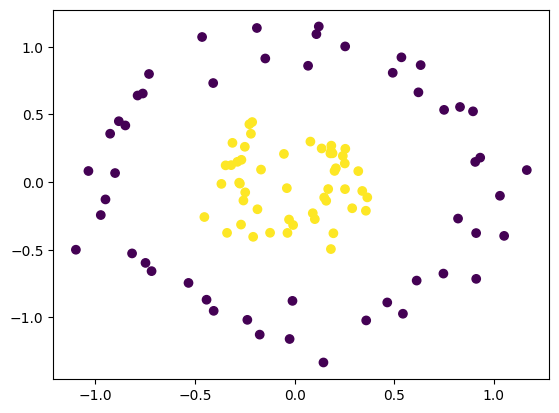

In [195]:
X, y = make_circles(n_samples=100, noise=0.1, factor=0.3, random_state=0)
X = X.T
y = y.reshape((1, y.shape[0]))

print('dimensions de X:', X.shape)
print('dimensions de y:', y.shape)

plt.scatter(X[0, :], X[1, :], c=y)
plt.show()


On voit bien que dans ce acs de figure, un modele lineraire ne permet pas de separer ces deux classes de points. 
Em machine learning, on pourrait faire dans ce cas du feature engineering, c'est a dire creer de nouvelles variables a partir des variables existantes, pour essayer de separer ces deux classes de points. On pourrait par exmple creer une nouvelle variable qui serait le produit de x1 et x2, ou bien le carre de x1 et/ou x2 afin de faire apparaitre un comportement polynomiale plus complexe, et separer les deux clqsses de points. Mais ce n'est pas toujours possible, et c'est parfois tres long et fastidieux de creer de nouvelles variables a partir des variables existantes.


En deep learning, c'est justement dans ca cas de figure qu'on va utiliser un reseau de neurones artficiels qui va effectuer son propre feature engineering. le reseau de neurones va apprendre par lui meme a separer les deux classes de points. Et pour autant, le modele intrinseques des neurones qui composent chaque couche du reseau de neurones reste lineaire. Vous commencez a saisir la puissance du deep learning ?

100%|██████████| 1000/1000 [00:00<00:00, 1742.48it/s]


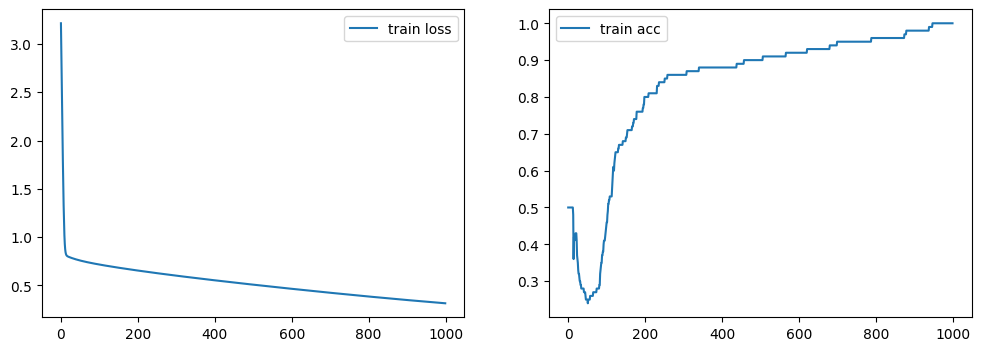

{'W1': array([[ 1.77432405,  0.43279495],
        [ 1.1270043 ,  2.33263418],
        [ 2.72469585, -1.36687471],
        [ 0.95547588, -0.15294234],
        [ 0.02266095,  0.03114714],
        [ 0.00511867,  2.26670042],
        [ 0.14297291,  0.1455327 ],
        [ 0.45500648,  0.2953939 ],
        [ 0.39364353,  0.05229975],
        [ 0.06948966, -0.26128899],
        [-2.60887662,  0.72497517],
        [ 1.7179407 , -1.26289978],
        [ 2.14891685, -1.47157603],
        [ 0.03962562, -0.14415223],
        [ 1.92434528,  1.47535576],
        [ 0.15385548,  0.32849369],
        [-1.49629642, -3.06026715],
        [-0.98713543,  0.32618646],
        [ 1.10834199,  1.17295969],
        [-0.21803429, -0.2155383 ],
        [-1.63542034, -2.16073358],
        [-1.88612734,  2.08720396],
        [-0.5753097 , -0.49394756],
        [-1.238711  ,  0.71719306],
        [-1.89550858, -0.1701086 ],
        [-0.24159264,  0.14472096],
        [-0.54156124, -1.19866227],
        [-0.11743641, 

In [196]:
neural_network(X, y, n1=32)

In [ ]:
def plot_decision_boundary(X, y, parameters, resolution=0.01):
    # Génère une grille de points
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution),
                         np.arange(y_min, y_max, resolution))
    
    # Aplatir et empiler pour obtenir des entrées 2xN
    grid = np.c_[xx.ravel(), yy.ravel()].T

    # Prédiction sur toute la grille
    Z = predict(grid, parameters)
    Z = Z.reshape(xx.shape)

    # Affichage
    plt.contourf(xx, yy, Z, alpha=0.5, cmap=plt.cm.Spectral)
    plt.scatter(X[0, :], X[1, :], c=y.flatten(), edgecolors='k', cmap=plt.cm.Spectral)
    plt.title("Decision Boundary")
    plt.show()


100%|██████████| 1000/1000 [00:00<00:00, 1504.80it/s]


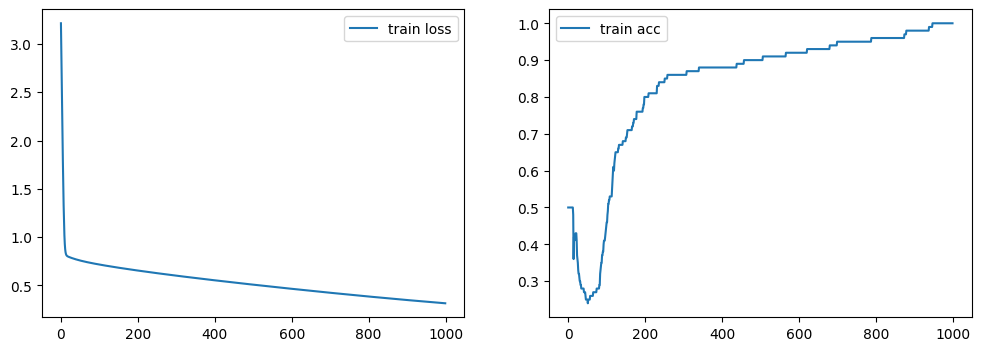

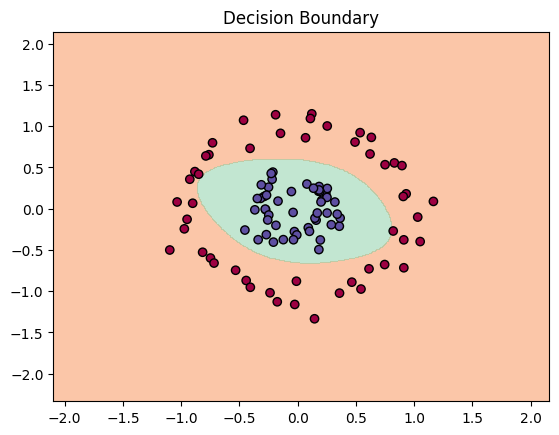

In [203]:
params = neural_network(X, y, epoch=1000)

plot_decision_boundary(X, y, params)
